# Lab | Feature extraction
For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

## Instructions

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Open the categoricals variable we created before.
categoricals = data.select_dtypes(np.object)

categoricals.head()


In [2]:
customers = pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")
customers.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
customers_cat = customers.select_dtypes("object")
customers_cat.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


### 2. Plot all the categorical variables with the proper plot. What can you see?

In [4]:
# Before any plotting, let's drop "Customer" column first as it does not provide anything of interest.
customers_cat = customers_cat.drop(columns = ["Customer"], axis = 1)
customers_cat.head()

,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [5]:
customers_cat.columns

Index(['State', 'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

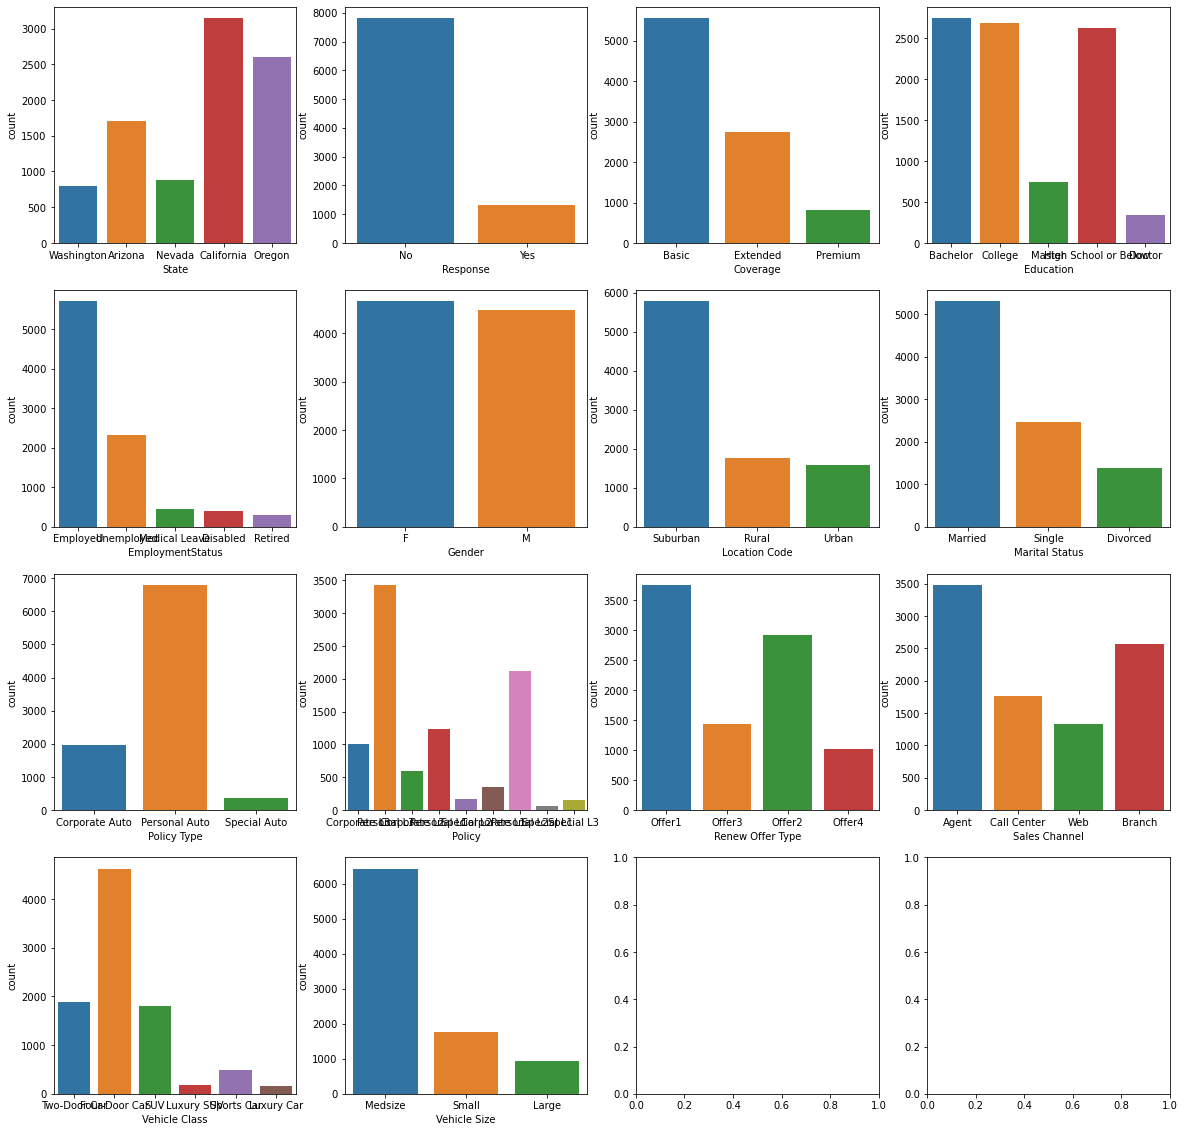

In [6]:
#SUBPLOTS
fig, ax = plt.subplots(4, 4, figsize = (20,20))

#PLOTS
sns.countplot(x = customers_cat['State'], ax = ax[0,0])
sns.countplot(x = customers_cat['Response'], ax = ax[0,1])
sns.countplot(x = customers_cat['Coverage'], ax = ax[0,2])
sns.countplot(x = customers_cat['Education'], ax = ax[0,3])
sns.countplot(x = customers_cat['EmploymentStatus'], ax = ax[1,0])
sns.countplot(x = customers_cat['Gender'], ax = ax[1,1])
sns.countplot(x = customers_cat['Location Code'], ax = ax[1,2])
sns.countplot(x = customers_cat['Marital Status'], ax = ax[1,3])
sns.countplot(x = customers_cat['Policy Type'], ax = ax[2,0])
sns.countplot(x = customers_cat['Policy'], ax = ax[2,1])
sns.countplot(x = customers_cat['Renew Offer Type'], ax = ax[2,2])
sns.countplot(x = customers_cat['Sales Channel'], ax = ax[2,3])
sns.countplot(x = customers_cat['Vehicle Class'], ax = ax[3,0])
sns.countplot(x = customers_cat['Vehicle Size'], ax = ax[3,1])

plt.show()

- As we know per previous work, 'Policy' and 'Policy type' include redundant data.
- In another vein, 'Coverage', 'Location Code', 'Vehicle Size', 'Marital status' and 'Policy type' display similar distributions.

### 3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

- As 'Policy' and 'Policy type' included redundand data, and as 'Policy' included richer data, 'Policiy Type' was discarted.

- Vehicle class also included redundancies in its data (high-end / luxury vehicles could be grouped together.

- Education could be restructured by grouping those who had advanced studies.

- Employment status could also be organized diffently, simply recognizing those who were Employed from those who were not.

All this was proposed and performed in previous labs.

### 4. Plot time variable. Can you extract something from it?

In [7]:
customers_cat["Effective To Date"] = pd.to_datetime(customers_cat["Effective To Date"])

<AxesSubplot:xlabel='Effective To Date', ylabel='Density'>

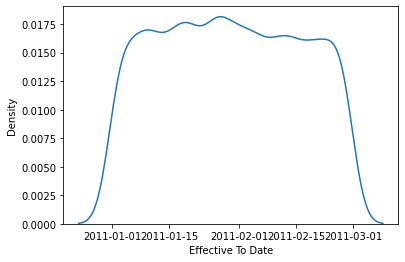

In [14]:
sns.kdeplot(data=customers_cat, x="Effective To Date")